<a href="https://colab.research.google.com/github/ImPrigoryunil/IT-2Lab/blob/main/General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Импорт библиотек

In [ ]:
!apt-get install -y python-rdkit librdkit1 rdkit-data
!pip install rdkit
!pip install cimtools
!pip install CGRTools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-rdkit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.9 MB/s eta 0:00:00
  Created wheel for cimtools: filename=CIMtools-4.0.8-cp310-cp310-linux_x86_64.whl size=29239286 sha256=b20cfa6d2e0768caac871886b342b28e186e0983989fbf322fb7dbe443030c11
  Stored in directory: /root/.cache/pip/wheels/1d/d0/b4/0ed53517fa1cb07e529b7e182373b611f4f96e056d9dbb2a50
  Created wheel for CGRtools: filename=CGRtools-4.0.41-cp310-cp310-linux_x86_64.whl size=867983 sha256=f094f1eebcd1bf9050ee48dcdb46ed2cab75f307def548a82fa32274ea672c6f
  Stored in direc

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import FunctionTransformer
from pandas import DataFrame
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from CGRtools.files import SMILESRead, SDFRead, SDFWrite, RDFRead, RDFWrite
from CGRtools.utils import from_rdkit_molecule, to_rdkit_molecule
from CGRtools import smiles
from io import StringIO, BytesIO
import csv

# 1. Чтение молекул

In [ ]:
# RDKit
ms = []
for m in Chem.SmilesMolSupplier('/content/MAO_smi.txt',titleLine=False):
  AllChem.Compute2DCoords(m)
  ms.append(m)
with open('/content/mols.sdf','w') as f:
  writer = Chem.SDWriter(f)
  for m in ms:
    writer.write(m)
  writer.close()

[23:23:06] WARNING: no name column found on line 0
[23:23:06] WARNING: no name column found on line 1
[23:23:06] WARNING: no name column found on line 2
[23:23:06] WARNING: no name column found on line 3
[23:23:06] WARNING: no name column found on line 4
[23:23:06] WARNING: no name column found on line 5
[23:23:06] WARNING: no name column found on line 6
[23:23:06] WARNING: no name column found on line 7
[23:23:06] WARNING: no name column found on line 8
[23:23:06] WARNING: no name column found on line 9
[23:23:06] WARNING: no name column found on line 10
[23:23:06] WARNING: no name column found on line 11
[23:23:06] WARNING: no name column found on line 12
[23:23:06] WARNING: no name column found on line 13
[23:23:06] WARNING: no name column found on line 14
[23:23:06] WARNING: no name column found on line 15
[23:23:06] WARNING: no name column found on line 16
[23:23:06] WARNING: no name column found on line 17
[23:23:06] WARNING: no name column found on line 18
[23:23:06] WARNING: no

In [ ]:
!pip install LigPrepper

# 2. Генерация дескрипторов

### 2.1 Дескрипторы физические

In [ ]:
molecules = [mol for mol in Chem.SDMolSupplier("/content/mols.sdf") if mol is not None]

[21:33:24] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 22 ignored
[21:33:24] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 25 ignored


In [ ]:
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR, "TPSA": Descriptors.TPSA}
def mol_dsc_calc(mols): #функция для генерации дескрипторов из молекул
  return DataFrame({k: f(m) for k, f in descriptors.items()} for m in mols)
descriptors_transformer = FunctionTransformer(mol_dsc_calc) #оформляем sklearn трансформер для использования в конвейерном моделировании (sklearn Pipeline)

In [ ]:
X = descriptors_transformer.transform(molecules)

Применение дескрипторов к новым молекулам

In [ ]:
molecules_new = [mol for mol in Chem.SDMolSupplier("/content/drive/MyDrive/mols_new.sdf") if mol is not None]

In [ ]:
X_new = descriptors_transformer.transform(molecules_new)

In [ ]:
X_new.head

<bound method NDFrame.head of         HeavyAtomCount  NHOHCount  NOCount  NumHAcceptors  NumHDonors  \
0                   49          3        6              3           3   
1                   47          2        5              3           2   
2                   43          2        4              2           2   
3                   47          2        5              3           2   
4                   56          2        7              4           2   
...                ...        ...      ...            ...         ...   
169603              71          1       12             10           1   
169604              79          1       13             11           1   
169605              72          3       13             13           3   
169606              70          4       12             14           3   
169607              75          3       11             10           3   

        NumHeteroatoms  NumRotatableBonds  NumValenceElectrons  \
0                    6     

## 2.2 Генерация молекулярных отпечатков при помощи библиотеки RDKit

In [ ]:
import rdkit.Chem.AllChem as AllChem
from numpy import zeros
from rdkit import DataStructs
def calc_morgan(mols):
  for_df = []
  for m in mols:
    arr = zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(m, 2), arr)
    for_df.append(arr)
  return DataFrame(for_df)
morgan_transformer = FunctionTransformer(calc_morgan)
X = morgan_transformer.transform(molecules)

NameError: ignored

In [ ]:
X.head

<bound method NDFrame.head of       0     1     2     3     4     5     6     7     8     9     ...  2038  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2420     0     1     0     0     0     0     0     0     0     0  ...     0   
2421     0     1     0     0     0     0     0     0     0     0  ...     0   
2422     0     0     0     0     0     0     0     0     0     0  ...     0   
2423     0     0     0     0     0     0     0     0     0     0  ...     0   
2424     0     0     0     0     0     0     0     0     0     0  ...     0   

      2039  2040  204

## 2.3 Генерация фрагментных дескрипторов ISIDA Fragmentor

In [ ]:
from CGRtools.files import SDFRead
from CIMtools.preprocessing import Fragmentor #from collections.abc import Mapping

In [ ]:
data = SDFRead('/content/mols.sdf').read()
fragmentor = Fragmentor(fragment_type=3, max_length=4)
X = fragmentor.fit_transform(data)

In [ ]:
print(X)

      C-C  C-C-C  C-C-C-C  C-C=C  C-C-C=C  C=C  C-C-C=O  C-C-C-O  C-C=O  \
0      33     57       83    2.0      2.0  1.0      0.0      0.0    0.0   
1      34     55       76    4.0      7.0  2.0      3.0      7.0    3.0   
2      33     57       82    2.0      2.0  1.0      3.0      7.0    1.0   
3      32     33       26   18.0     20.0  7.0      0.0      3.0    0.0   
4      32     33       26   18.0     20.0  7.0      0.0      3.0    0.0   
...   ...    ...      ...    ...      ...  ...      ...      ...    ...   
2371   34     57       82    2.0      2.0  1.0      0.0      7.0    1.0   
2372   31     34       27   18.0     24.0  8.0      0.0     10.0    0.0   
2373   34     57       82    2.0      2.0  1.0      3.0      4.0    2.0   
2374   37     58       81    0.0      0.0  0.0      2.0      9.0    3.0   
2375   36     57       76    4.0      8.0  2.0      2.0      9.0    3.0   

      C-C-O  ...  C-C-C+N  C-C+N  C+N  N=C-C=O  N-C-C=N  C-C=C-F  C=C-F  \
0       0.0  ...      0.

запись фрагментов в файл

In [ ]:
import pandas as pd
df = pd.DataFrame(X)
print(df)
df.to_csv('desc_MAO.csv')

      C-C  C-C-C  C-C-C-C  C-C=C  C-C-C=C  C=C  C-C-C=O  C-C-C-O  C-C=O  \
0      33     57       83    2.0      2.0  1.0      0.0      0.0    0.0   
1      34     55       76    4.0      7.0  2.0      3.0      7.0    3.0   
2      33     57       82    2.0      2.0  1.0      3.0      7.0    1.0   
3      32     33       26   18.0     20.0  7.0      0.0      3.0    0.0   
4      32     33       26   18.0     20.0  7.0      0.0      3.0    0.0   
...   ...    ...      ...    ...      ...  ...      ...      ...    ...   
2371   34     57       82    2.0      2.0  1.0      0.0      7.0    1.0   
2372   31     34       27   18.0     24.0  8.0      0.0     10.0    0.0   
2373   34     57       82    2.0      2.0  1.0      3.0      4.0    2.0   
2374   37     58       81    0.0      0.0  0.0      2.0      9.0    3.0   
2375   36     57       76    4.0      8.0  2.0      2.0      9.0    3.0   

      C-C-O  ...  C-C-C+N  C-C+N  C+N  N=C-C=O  N-C-C=N  C-C=C-F  C=C-F  \
0       0.0  ...      0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В отличие от дескрипторов RDKit, данные дескрипторы настраиваются под
имеющийся обучающий набор. Поэтому для дальнейшего использования
с тестовым набором объект необходимо использовать еще раз, применяя метод
только .transform, а не .fit или .fit_transform.

Получение дескрипторов от нового набора данных для предсказания активности

In [ ]:
# RDKit
ms = []
for m in Chem.SmilesMolSupplier('/content/mols_new.sdf',titleLine=False):
  AllChem.Compute2DCoords(m)
  ms.append(m)
with open('/content/mols_new.sdf','w') as f:
  writer = Chem.SDWriter(f)
  for m in ms:
    writer.write(m)
  writer.close()

[23:32:39] SMILES Parse Error: syntax error while parsing: M
[23:32:39] SMILES Parse Error: Failed parsing SMILES 'M' for input: 'M'
[23:32:39] ERROR: Smiles parse error on line 78
[23:32:39] ERROR: Cannot create molecule from : 'M'


ArgumentError: ignored

In [ ]:
data_new = SDFRead('/content/mols_new.sdf').read()
X_new = fragmentor.transform(data_new)

In [ ]:
import numpy
numpy.savetxt("/content/desc_new_mols.csv", X_new, delimiter=";")

# 3 Машинное обучение

В данной главе демонстрируется процесс создания классификационной
и регрессионной моделей с использованием метода машинного обучения
Случайный Лес (Random Forest)
7
. Все необходимые компоненты для
моделирования есть в пакете Sklearn. Для моделирования будем использовать
ранее полученные фрагментные дескрипторы.

## 3.1 Импорт библиотек

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid, RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, balanced_accuracy_score

## 3.2 Нормализация дескрипторов


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X) # запоминание параметров шкалирования на обучающем наборе
X_norm = DataFrame(scaler.transform(X), index=X.index, columns=X.columns) #применение шкалирования


Однако для выбранного для практики метода Случайный лес данную
процедуру выполнять нет необходимости, поскольку он нечувствителен
к шкалированию.

## 3.3 Конвейеры моделирования

В Sklearn реализована концепция обработки данных и конечного
моделирования, которая называется конвейер. Суть конвейера
в последовательном применении изменений над данными. Ниже приведен
пример конвейера для подготовки данных для метода машинного обучения. Он
объединяет процедуры генерации дескрипторов из химических структур и их
нормализацию.


In [ ]:
desc = Pipeline([('fr', fragmentor),('scale', scaler)])

In [ ]:
X = desc.fit_transform(data)
print(X)

[[0.31818182 0.6        0.73267327 ... 0.         0.         0.        ]
 [0.34090909 0.57142857 0.66336634 ... 0.         0.         0.        ]
 [0.31818182 0.6        0.72277228 ... 0.         0.         0.        ]
 ...
 [0.34090909 0.6        0.72277228 ... 0.         0.         0.        ]
 [0.40909091 0.61428571 0.71287129 ... 0.         0.         0.        ]
 [0.38636364 0.6        0.66336634 ... 0.         0.         0.        ]]


### Регресионное моделирование

Большинство методов машинного обучения имеют множество
параметров, влияющих на поиск зависимостей в обучающем наборе данных.
Случайный лес не исключение. Поэтому, чтобы получить оптимальную модель
необходимо перебрать параметры в поисках лучшей комбинации. Подготовим
списки варьируемых параметров таких как количество дескрипторов для
построения одного дерева 'max_features': 'sqrt' – корень от общего
количества дескрипторов; 'log2' — логарифм по основанию 2; None – все
дескрипторы и количество деревьев 'n_estimators'.


In [ ]:
les = RandomForestRegressor(n_estimators=100,n_jobs=10)

In [ ]:
params = {'max_features':('sqrt', None),'n_estimators':( 350, 500)}

Используем метод автоматического перебора параметров GridSearchCV
с типом перекрестного контроля и количеством его повторений в классе
RepeatedKFold.


In [ ]:
cv = RepeatedKFold(n_repeats=5,n_splits =5)
gscv = GridSearchCV(param_grid=params, cv=cv, estimator=les)

Проведем перебор параметров, последовательно обучая модель на всех
возможных комбинациях. Оценку модели проведем в ходе процедуры
скользящего контроля с повторением.


Введение в прогрмму данных об энергиях связи

In [ ]:
import csv
from itertools import zip_longest

csvfile = []
reader = csv.reader(open('/content/MAO_gem.txt'), delimiter = ';')
for row in reader:
    csvfile.append(row)
smi=[]
for l in csvfile:
  smi.append(l[0])
for g in smi:
  print(g)
Energy=[]
for l in csvfile:
  Energy.append(float(l[1]))
for g in Energy:
  print(g)

[C@@H]1([C@@H]2CC[C@]3([C@@]4(CC[C@@H]5[C@](C)(CCCC5(C)C)[C@H]4CC[C@@H]3[C@@]2(C)CC1)C)C)C(=C)C
[C@@H]1([C@H]2[C@@](CC[C@]3([C@]4([C@@H]([C@@]5([C@@H](C=C4)C(C)(C)[C@H](CC5)OC(=O)COCC(=O)O)C)CC[C@H]23)C)C)(CC1)C(=O)O)C(=C)C
[C@@H]1([C@H]2[C@](CC[C@]3([C@]4([C@@H]([C@@]5([C@@H](CC4)C(C)(C)[C@@H](O)CC5)C)CC[C@H]23)C)C)(CC1)C(=O)O)C(=C)C
C1(=C(C)C)/C(=C\C=C\2/[C@H]3[C@@]45[C@@]6(C=C=C(C)C(=C)C)[C@@]78[C@@H]([C@@H]67)[C@]8(O)C=C4[C@@]235)/[C@]23C[C@]42[C@@]3(C1)N4O
C1(=C(C)C)/C(=C\C=C\2/[C@H]3[C@@]45[C@@]6(C=C=C(C)C(=C)C)[C@@]78[C@@H]([C@@H]67)[C@]8(O)C=C4[C@@]235)/[C@]23C[C@]42[C@@]3(C1)N4O
[C@@H]1([C@H]2[C@@](CC[C@]3([C@]4([C@@H]([C@@]5([C@H](CC4)C(C)(C)[C@@H](O)CC5)C)CC[C@H]23)C)C)(CC1)/C=N/O)C(=C)C
[C@@H]1([C@H]2[C@@](CC[C@]3([C@]4([C@@H]([C@@]5([C@H](CC4)C(C)(C)[C@H](CC5)OC(=O)C)C)CC[C@H]23)C)C)(CC1)COC(=O)C)C(=C)C
[C@@H]1([C@@H]2[C@@](CC[C@]3([C@]4([C@@H]([C@@]5([C@@H](CC4)C(C)(C)[C@H](CC5)OC(=O)C)C)CC[C@H]23)C)C)(CC1)COC(=O)C)C(=C)C
[C@@H]1([C@@H]2[C@@](CC[C@]3([C@]4([C@@H]([C@@]5([

In [ ]:
gscv.fit(X, Energy)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=RandomForestRegressor(n_jobs=10),
             param_grid={'max_features': ('sqrt', None),
                         'n_estimators': (350, 500)})

Посмотреть результаты перекрестного контроля с заданными
параметрами можно в атрибуте .cv_results_. Поскольку у нас было 3 и 4
варианта значений параметров, то в итоге получается 12 комбинаций. Для
регрессионных моделей по умолчанию используется метрика качества R^2
.

In [ ]:
gscv.cv_results_["mean_test_score"]

array([0.66900036, 0.66961309, 0.66657587, 0.66646248])

Посмотреть лучшие параметры можно в атрибуте best_params_.


In [ ]:
gscv.best_params


AttributeError: ignored

### Классификационное моделирование

Поскольку в нашем наборе данных измеренные величины – натуральные
числа, нам придется ввести порог для разделения молекул на активные и нет.
Здесь порогом для значений выберем -12. Все молекулы, для которых значения
будут vtymit -10, будем считать активными молекулами, остальные –
неактивными.


In [ ]:
Y_c = [x<-10 for x in Energy]


In [ ]:
les_c = RandomForestClassifier(n_estimators=100,n_jobs=10)

In [ ]:
gscv_c = GridSearchCV(param_grid=params,cv=cv,estimator=les_c)
gscv_c.fit(X, Y_c)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(n_jobs=10),
             param_grid={'max_features': ('sqrt', None),
                         'n_estimators': (350, 500)})

In [ ]:
gscv_c.best_params_


{'max_features': 'sqrt', 'n_estimators': 350}

### Построение конечной модели

Построим конвейер для регрессионной модели, используя уже
настроенный объект gscv.best_estimator_, который содержит обученный
регрессионный лес на лучших параметрах.

In [ ]:
reg_model = Pipeline([('estimator',gscv_c.best_estimator_)])

Предсказываем свойство начального набора данных на полученной модели.
В идеале должно получится 1.0, что означает, что зависимости исходного
набора полностью обнаружены. Поскольку мы использовали скользящий
контроль, переобучения модели не должно происходить. Однако на
переобучение влияет множество факторов, в том числе набор обучающих
данных.


In [ ]:
pred = reg_model.predict(X)


предсказываем свойство новых молекул


In [ ]:
pred_new = reg_model.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import numpy
numpy.savetxt("pred_new_mols.csv", pred_new, delimiter=";")

Проверяем качество предсказания регрессионной моделью с использованием
коэффициента детерминации.

In [ ]:
r2_score(pred, Energy)

-416.45799320637457

Построение конечной классификационной модели

In [ ]:
reg_model_с = Pipeline([('estimator',gscv_c.best_estimator_)])

In [ ]:
pred_new_с = reg_model_с.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import numpy
numpy.savetxt("pred_new_c_mols_MAO.csv", pred_new_с, delimiter=";")

# 4 Домен применимости моделей

## 4.1 Классика


Несмотря на широкое разнообразие предложенных подходов к оценке
домена применимости моделей, большинство их объединяет общая идея –
в домен применимости модели должны попадать только те химические
объекты, которые похожи на объекты, использованные для ее построения.
Все необходимые функции и объекты реализованы в пакетах Sklearn
и CIMtools.


In [ ]:
from CIMtools.preprocessing import DictToConditions, ConditionsToDataFrame, EquationTransformer, SolventVectorizer, Fragmentor, CGR
from CIMtools.applicability_domain import Box, ReactionTypeControl, Leverage
from CGRtools.files import RDFRead
from sklearn.model_selection import KFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


ImportError: ignored

Определим функции для расчета характеристик качества моделей
с использованием домена применимости модели.
Расчет среднеквадратичной ошибки (RMSE) для объектов внутри домена
применимости модели.

In [ ]:
def rmse_score_with_ad(Y_true, Y_pred, AD):
 if AD.sum(): # количество объектов внутри домена применимости модели
  return np.sqrt(mean_squared_error(Y_true[AD], Y_pred[AD]))
 return np.inf

Расчет коэффициента детерминации (R
2
) для объектов внутри домена
применимости модели.

In [ ]:
def r2_score_with_ad(Y_true, Y_pred, AD):
 if AD.sum(): # количество объектов внутри домена применимости модели
  return r2_score(Y_true[AD], Y_pred[AD])
 return -np.inf

Доля объектов, принадлежащие домену применимости модели.

In [ ]:
def coverage(AD):
 return sum(AD)/len(AD)

Построение модели и оценка ее домена применимости будет показано
на наборе реакций Дильса-Альдера. Данный набор больше, чем
использованный ранее, что позволит избежать ряда проблем небольших
выборок, таких как смещенность и переобучение. Однако, все описанные
манипуляции точно также подходят и для моделирования свойств молекул.

In [ ]:
data = RDFread('data/DA.rdf').read()


NameError: ignored

В отличие от молекул, свойства реакций сильно зависят от условий
проведения, таких как: температура и растворитель. Поэтому здесь мы
подготовим конвейер для извлечения дескрипторов растворителей
и температуры.

In [ ]:
def extract_meta(x):
 return [y[0].meta for y in x]
features = ColumnTransformer([
('temp', EquationTransformer('1/x'), ['temperature']),
('solv', SolventVectorizer(), ['solvent.1']),
('amount', 'passthrough', ['solvent_amount.1']),])
conditions = Pipeline([
('meta', FunctionTransformer(extract_meta)),
('cond', DictToConditions(solvents=('additive.1',),
temperature='temperature', amounts=('amount.1',))),
('desc', ConditionsToDataFrame()),
('final', features)])


Конвейер выше принимает на вход объекты реакций и извлекает из них
метаданные, в которых содержится информация об условиях. Температура
преобразовывается в обратное значение (1/T, К-1
), а названия растворителей
заменяются на вектора из 13 физико-химических параметров.


In [ ]:
graph = Pipeline([
('CGR', CGR()),
('frg', Fragmentor(max_length=4, useformalcharge=True)),
('scaler', StandardScaler())])

Второй конвейер позволяет обработать структурную информацию
реакций. Для этого воспользуемся подходом КГР. Поскольку фрагментные
дескрипторы ISIDA поддерживают КГР, мы можем закодировать реакцию
с вниманием на саму трансформацию (механизм реакции).

In [ ]:
dsc = ColumnTransformer([('cond', conditions, [0]),
 ('graph', graph, [0])])

Объединив оба конвейера, можно получить итоговый конвейер, который
преобразует структуру и условия в дескрипторы. Интерфейс полученного
объекта аналогичен интерфейсу описанных ранее генераторов дескрипторов.
Обратите внимание, что исходные данные из простого списка пришлось
преобразовать во вложенные списки. Данное преобразование превратило
32
список структур в матрицу с одной колонкой, потому что в Sklearn свойства
объектов должны описываться в виде матриц.


In [ ]:
X = dsc.fit_transform([[x] for x in data]))

Делим данные (X, Y, data) на обучающую и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test, data_train, data_test = tra
in_test_split(X, Y, data, test_size=0.2, random_state=0)

Строим регрессионную модель.

In [ ]:
est = RandomForestRegressor(random_state=1, n_estimators=500,
max_features=.35, n_jobs=4)
est.fit(X_train, y_train)

Предсказываем константу скорости (lоgk) реакций.

In [ ]:
y_pred = est.predict(X_test)


Рассчитываем качество модели.


In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### 4.2 Leverage

Для определения домена применимости модели в данном случае
используется числовая характеристика (показатель влиятельности),
характеризующая расстояние между рассматриваемым химическим объектом
и геометрическим центром облака точек, образованного входящими
в обучающую выборку объектами. Показатель влиятельности (англ. Leverage) –
это величина h, определяемая как h = х
T
(X
TX)
-1
х, где X – матрица, первый
столбец которой состоит из единиц, а элемент на пересечении i-ой строки
и (j+1)-ого столбца равен значению j-ого дескриптора для i-ого химического
объекта из обучающей выборки. Считается, что объект принадлежит домену
применимости модели, если для него значение показателя влиятельности не
превышает пороговое. Недостатком данного метода является отсутствие
строгих правил в литературе по определению порогового значения. Однако мы
можем найти оптимальный порог h* в ходе процедуры внутренней
перекрестной проверки с использованием некоторой метрики качества.


In [ ]:
lev = Leverage(threshold='auto') # если threshold='auto', то отсечка будет определяться как h*=3*(M+1)/N
                                # если threshold='cv', то отсечка будет найдена с помощью внутренней кросс-валидации
lev.fit(X_train)
ad_lev = lev.predict(X_test)
rmse_inliers_with_lev = rmse_score_with_ad(y_test, y_pred, ad_lev)
r2_inliers_with_lev = r2_score_with_ad(y_test, y_pred, ad_lev)
coverage_inliers_with_lev = coverage(ad_lev)
rmse_outliers_with_lev = rmse_score_with_ad(y_test, y_pred, ~ad_lev)
r2_outliers_with_lev = r2_score_with_ad(y_test, y_pred, ~ad_lev)
coverage_outliers_with_lev = coverage(~ad_lev)


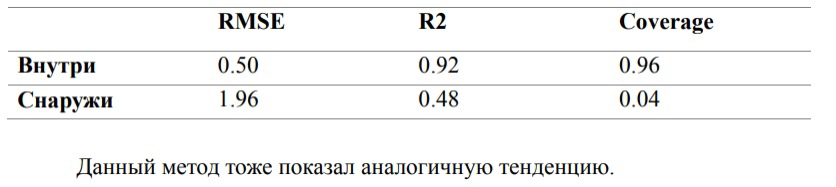

Как видно из приведенных примеров, домен применимости позволяет
контролировать, когда стоит доверять модели, а когда нет. Применительно
к разработке лекарств, это позволит значительно сократить число
ложноположительных или ложноотрицательных предсказаний модели.
Особенно это полезно на стадии поиска структур с желаемой активностью.

# 5 Генерация структур Маркуша

### Пока не понимаю стоит ли вручную все это делать или можно лениться дальше ctrl+c ctrl+v

# 6 Дизайн библиотек соединений *de novo*

### 6.1 torch-rnn
### De novo molecule design with chemical language models

https://github.com/grisoniFr/de_novo_design_RNN/blob/622628317c2ee6545eea9643767216904a7d7415/README.md

**6.1.1 Preliminary steps**

In [ ]:
!pip install ugtm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 5.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
from rdkit import Chem
from rdkit.Chem import SaltRemover

In [ ]:
!git clone https://github.com/ETHmodlab/de_novo_design_RNN

Cloning into 'de_novo_design_RNN'...
^C


In [ ]:
# adds the paths to the repo folder
import sys
sys.path.insert(1, '../preprocessing/') # preprocessing code
sys.path.insert(1, '../experiments/') # folder with configuration files
sys.path.insert(1, '../data/') # data code
sys.path.insert(1, '../model/') # model code
sys.path.insert(1, '../evaluation/') # model code
import os
# repo modules
from main_preprocessor import preprocess_data #for data preprocessing
import configparser # to automatically change the .ini file
from sample import Sampler

# other modules
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw # for molecule depiction
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold
import ChemTools
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'main_preprocessor'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

**6.1.2 Model and fine-tuning settings**

**Model architecture**


As the first thing, we need to choose the settings for our model. Such settings will be used to prepare the data and for the fine-tuning procedure. In particular, you need to set each of the following elements:

model (str): type of RNN to use, i.e. 'BIMODAL' or 'ForwardRNN'
network_size (int): total number of hidden units (recommended: 1024)
start (str): position of the starting token for BIMODAL ('fixed' or 'random')
augmentation_level (int): level of augmentation for BIMODAL, recommended 5 (1 is no augmentation).
For this exercise, we choose the settings as specified below.

In [ ]:
model = 'BIMODAL'
start = 'random'
augmentation_level = 5
network_size = 512


**Fine-tuning settings**

Now, we need to specify how we want the model to be fine-tuned. In what follows, you can specify these options:

fine_tuning (str): name of the dataset for fine-tuning (without file extension). If the set is in /data, only the name is sufficient, otherwise, specify the full path; only .csv and tar.xz are admitted.
epochs (int): number of fine-tuning epochs. The higher the number, the closer the design to the fine-tuning molecules.

In [ ]:
# training process
fine_tuning = 'fine_tuning'
epochs = 25

**Sampling settings**

Finally, we can specify how we want to sample from the fine-tuned model:

T_sampling (double): temperature for sampling. This represents how "fuzzy" the sampling will be, reflecting in the diversity of the designs (the higher, the higher the diversity). Reccomended 0.7.
n_sampling (int): number of SMILES strings to sample at each fine-tuning epoch
sample_valid (bool): if set to True, only valid SMILES are considered to reach n_sampling
sample_novel (bool): if set to True, only SMILES not included in the training set are considered to reach n_sampling
sample_unique (bool): if set to True, only SMILES corrisponding to different molecules are considered to reach n_sampling
For the exercise, we chose the settings below:

In [ ]:
# sampling process
T_sampling = 0.7
n_sampling = 1000

**6.1.3 Fine tuning data**

**Import and analyze fine tuning data**

SMILES strings

The fine-tuning data for this example are provided in the /example folder, as a .csv file (fine_tuning.csv). You can visualize the content of the file with the following lines of code:

In [ ]:
ft_set = pd.read_csv('/content/Scaf_smi.txt',header=0)
ft_set.head() # preview

We can also look have a look at each SMILES individually, e.g. with the following command:

In [ ]:
smiles = ft_set.iloc[0,0] # molecule in row no. 0 (bexarotene)
smiles

This string can be converted into a depiction with the following command available in RDKit

In [ ]:
mol = Chem.MolFromSmiles(smiles)
mol # for display

RDKit can be also used to obtain a canonicalized SMILES, as follows:

In [ ]:
Chem.MolToSmiles(mol)

The canonical SMILES obtained will always be univocal for the same molecule, while other SMILES strings might be different.

**Fine-tuning molecules**

In this example, we will import molecules as an rdkit supplier, which allows us to visualize them easily

In [ ]:
ft_mols = Chem.SmilesMolSupplier('../example/fine_tuning.csv',nameColumn=-1,titleLine=False)
number_mol = len(mols) # number of molecules in your list
number_mol # prints the number of molecules

Visualize the chosen fine-tuning molecules

In [ ]:
Draw.MolsToGridImage(ft_mols, molsPerRow=2, subImgSize=(350,350),legends=[str(i+1) for i in range(number_mol)])

**6.1.4 Model fine-tuning**

**Prepare the molecules for fine-tuning**

In this notebook, we will use BIMODAL, with random start, 5x augmentation, and a net size of 1024, as specified above.

Thus, we need to process the fine-tuning data accordingly, before model training.

In [ ]:
# Uncomment the following line to execute the pretreatment again. Attention: this will overwrite the existing file!
#preprocess_data(filename_in='fine_tuning', model_type=model, starting_point=start, augmentation=augmentation_level)

In [ ]:
filepath = '../data/'+ fine_tuning + '_' + model + '_' + start + '.csv' #path to the pretreated file based on the settings
ft_set = pd.read_csv(filepath,header=None)
ft_set.head() # preview

Each row will correspond to one fine-tuning molecule, while each column will be referred to one "augmented" version. The 'A' token is used for padding, i.e., to allow each string to have the same length, independently of the length of the original SMILES string.

You can print all the strings (without the 'A' token) referring, for instance, to bexarotene (row 0):

In [ ]:
for i in range(0,augmentation_level):
    print(ft_set.iloc[0,i].replace('A',''))

Note that every time the pretreatment procedure is repeated, different positioning of the G token will be obtained, due to the random placement.

**Fine-tune your model**

In [ ]:
import utils
exp_name = utils.make_config(model_type=model, net_size=network_size, epochs=epochs, starting_point=start, fine_tuning='fine_tuning', n_sampling=n_sampling,T_sampling=T_sampling,augmentation_level=augmentation_level)


**!!!Не до конца!!!**

### 6.2 BBAR (Работает!) дизайн молекул по известным реакциям под свойства

**Step 0-1. Install Packages and Change Current Directory.**

In [ ]:
# Install RDKit and additional packages
!pip install rdkit-pypi
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 34.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=f7dd9f86bbdae91933103bd777f11649abc1621f5b6c477041f2f54052cc1ad8
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
# Import Pytorch Geometric
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html

Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.5 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 7.8 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.5 MB/s eta 0:00:00


In [ ]:
import os
os.chdir('/content')
CODE_DIR = 'bbar'
!git clone https://github.com/SeonghwanSeo/BBAR.git $CODE_DIR
os.chdir(f'/content/{CODE_DIR}')

Cloning into 'bbar'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 316 (delta 140), reused 277 (delta 112), pack-reused 0
Receiving objects: 100% (316/316), 10.00 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [ ]:
import gdown
if not os.path.exists('./test/pretrained_model') :
  os.chdir(f'./test')
  !gdown '16BK_tjOUmuMuWjSvV3TeLVc86PeAKig-'
  !tar -xvf './pretrained_model.tar'
  os.chdir(f'../')
assert os.path.exists('./test/pretrained_model'), 'Fail to load pretrained model'

Downloading...
From: https://drive.google.com/uc?id=16BK_tjOUmuMuWjSvV3TeLVc86PeAKig-
To: /content/bbar/test/pretrained_model.tar
100% 53.9M/53.9M [00:01<00:00, 30.2MB/s]
pretrained_model/
pretrained_model/3cl_affinity.tar
pretrained_model/logp.tar
pretrained_model/mw.tar
pretrained_model/qed.tar
pretrained_model/tpsa.tar
pretrained_model/logp_tpsa.tar


**Step 0-2. Import Packages**

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:00


In [ ]:
import torch

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from omegaconf import OmegaConf
from IPython.display import display, Image
import time

from bbar.generate import MoleculeBuilder

**Step 0-3. Util Functions**

In [ ]:
def display_molecule(mol, size=(300, 300)) :
    display(Chem.Draw.MolToImage(mol, size=size))

**Step 1. Generate a Single Molecule**

**Step 1-0. TL;DR**

Embed building block library and Save embedding matrix (first run)
The first run for each property takes 1~2 minutes.
After that, it takes about 5 seconds.
Input
- Core Molecule SMILES: 'C[C@H](N)C(=O)C1=CC=CC=C1'
- Condition: {'mw': 300}

>>> generator.generate('C[C@H](N)C(=O)C1=CC=CC=C1', {'mw': 300})
SMILES: CC(C)CC(=O)N(CC(C)C#N)[C@@H](C)C(=O)c1ccccc1
mw: 300.184	(Target: 300)


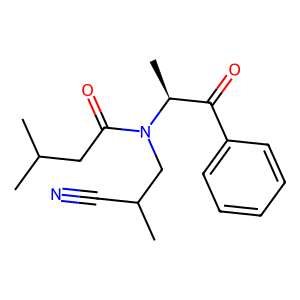

In [ ]:
# Load Model
print('Embed building block library and Save embedding matrix (first run)')
print('The first run for each property takes 1~2 minutes.')
print('After that, it takes about 5 seconds.')
generator_config_path = './test/generation_config/mw.yaml'
generator_config = OmegaConf.load(generator_config_path)
generator = MoleculeBuilder(generator_config)

# Input
scaffold_smiles = 'C[C@H](N)C(=O)C1=CC=CC=C1'
condition = {'mw': 300}

print('Input')
print(f"- Core Molecule SMILES: '{scaffold_smiles}'")
print(f'- Condition: {condition}')
print()
print(f">>> generator.generate('{scaffold_smiles}', {condition})")

# Generation
generated_mol = generator.generate(scaffold_smiles, condition)

# Print
generated_smiles = Chem.MolToSmiles(generated_mol)
print('SMILES:', generated_smiles)
property_value = Chem.Descriptors.ExactMolWt(generated_mol)
print(f'mw: {property_value:.3f}\t(Target: 300)')

# Display
display_molecule(generated_mol)

**Step 1-1. Select Experiment Type**

Select the property of interest.

Available property list

mw (Molecular Weight)
logp (simple log water-octanol partition coefficient)
tpsa (topological polar surface area)
qed (Quantitative Estimation of Drug-likeness)


In [ ]:
# Config
property_name = input('Property: ')   # Among 'mw', 'logp', 'tpsa', 'qed'
assert property_name in ['mw', 'logp', 'tpsa', 'qed']

# Get property function
# property_value = property_fn(mol)
# ex) >> Chem.Descriptors.ExactMolWt(benzene)
#     78
if property_name == 'mw' :
    property_fn = Chem.Descriptors.ExactMolWt
elif property_name == 'logp':
    property_fn = Chem.Descriptors.MolLogP
elif property_name == 'tpsa':
    property_fn = Chem.Descriptors.TPSA
elif property_name == 'qed':
    property_fn = Chem.Descriptors.qed

Property: mw


**Step 1-2. Setup Generator**

For the first run for each property, generator encodes building block library and save embedding matrix.

It takes about 1~2 minutes.

After that, it takes about 5 seconds.

In [ ]:
generator_config_path = f'./test/generation_config/{property_name}.yaml'
generator_config = OmegaConf.load(generator_config_path)
print(OmegaConf.to_yaml(generator_config))
generator = MoleculeBuilder(generator_config)

model_path: ./test/pretrained_model/qed.tar
library_path: ./data/ZINC/library.csv
library_builtin_model_path: ./test/builtin_model/qed.tar
window_size: 2000
alpha: 0.75
max_iteration: 10



In [ ]:
# Check Model Size (non-embeded model vs embeded model)
print('Model Parameter File')
!du -sh {generator_config.model_path}
print()
print('Library-Embedded Model Parameter File')
!du -sh {generator_config.library_builtin_model_path}

Model Parameter File
8.6M	./test/pretrained_model/qed.tar

Library-Embedded Model Parameter File
45M	./test/builtin_model/qed.tar


**Step 1-3. Set Scaffold (Core Molecule)**

SMILES: C[C@H](N)C(=O)C1=CC=CC=C1


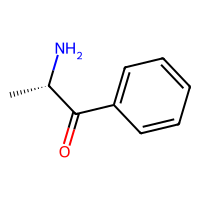

In [ ]:
#scaffold_smiles = 'c1ccccc1'
scaffold_smiles = input('SMILES: ')
scaffold_mol = Chem.MolFromSmiles(scaffold_smiles)
display_molecule(scaffold_mol, size=(200, 200))

**Step 1-4. Set Target Condition**

Example Condition

MolWt: 200, 250, 300, 350, 400, 450, 500, 550

logP: -4, -2, 0, 2, 4, 6, 8

TPSA: 40, 60, 80, 100, 120, 140, 160, 180

QED: 0.2, 0.4, 0.6, 0.8, 1.0

In [ ]:
target_condition = float(input(f'Target {property_name}: '))

Target mw: 100


**Step 1-6. Summary**

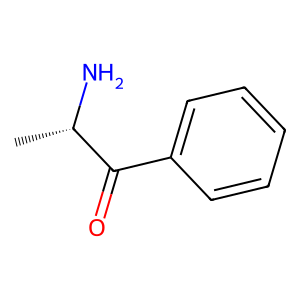

In [ ]:
# Load Model
generator_config_path = './test/generation_config/mw.yaml'
generator_config = OmegaConf.load(generator_config_path)
generator = MoleculeBuilder(generator_config)

# Input
scaffold_smiles = 'C[C@H](N)C(=O)C1=CC=CC=C1'
condition = {'mw': 100}

# Generation
mol = generator.generate(scaffold_smiles, condition)

# Display
display_molecule(mol)

**Step 2. Generate Molecules (Statistical Analysis)**

**Step 2-1. Generation Script**

In [ ]:
def run_generation(scaffold_smiles, property_name, target_condition_list, num_samples) :
    # Setup Generator
    print('Generation Setup...', end = ' ')
    generator_config_path = f'./test/generation_config/{property_name}.yaml'
    generator_config = OmegaConf.load(generator_config_path)
    generator = MoleculeBuilder(generator_config)
    print('Finish!')

    # Run Generator
    print('Generation Start!')
    print(f'Core Molecule: {scaffold_smiles}')
    generation_dict = {}
    for target_condition in target_condition_list :
        generated_mol_list = []
        condition = {property_name: target_condition}
        print(f'{property_name}: {target_condition}', end='\t')

        st = time.time()
        for _ in range(num_samples) :
            mol = generator.generate(scaffold_smiles, condition)
            if mol is not None :
                generated_mol_list.append(mol)
        end = time.time()
        time_cost = end - st
        generation_dict[target_condition] = generated_mol_list
        print(f'Success: {len(generated_mol_list)}/{num_samples}\t{time_cost/num_samples:.3f} sec/mol')
    return generation_dict

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_property_distribution(generation_dict, property_name, target_condition_list, property_xlim) :
    if property_name == 'mw' :
        property_fn = Chem.Descriptors.ExactMolWt
    elif property_name == 'logp':
        property_fn = Chem.Descriptors.MolLogP
    elif property_name == 'tpsa':
        property_fn = Chem.Descriptors.TPSA
    elif property_name == 'qed':
        property_fn = Chem.Descriptors.qed

    plt.figure(figsize=(8,4))
    for target_condition in target_condition_list :
        generated_mol_list = generation_dict[target_condition]
        property_value_list = [property_fn(mol) for mol in generated_mol_list]
        plt.axvline(target_condition, color='lightgrey')
        sns.kdeplot(property_value_list, label=f'{property_name}={target_condition}')
    plt.xlim(property_xlim)
    plt.xlabel(property_name)
    plt.xticks(target_condition_list)
    plt.legend()
    plt.show()

**Step 2-2. Generation**

Run one of the among cells.

In [ ]:
scaffold_smiles = input()
num_samples = int(input())

C[C@H](N)C(=O)C1=CC=CC=C1
1000


**MolWt**


Target Condition List

>  200, 250, 300, 350, 400, 450, 500, 550


Generation Setup... Finish!
Generation Start!
Core Molecule: C[C@H](N)C(=O)C1=CC=CC=C1
mw: 100	Success: 1000/1000	0.005 sec/mol
mw: 120	Success: 1000/1000	0.006 sec/mol
mw: 140	Success: 1000/1000	0.005 sec/mol


<ipython-input-35-90af1c7600f9>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(property_value_list, label=f'{property_name}={target_condition}')
<ipython-input-35-90af1c7600f9>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(property_value_list, label=f'{property_name}={target_condition}')
<ipython-input-35-90af1c7600f9>:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(property_value_list, label=f'{property_name}={target_condition}')


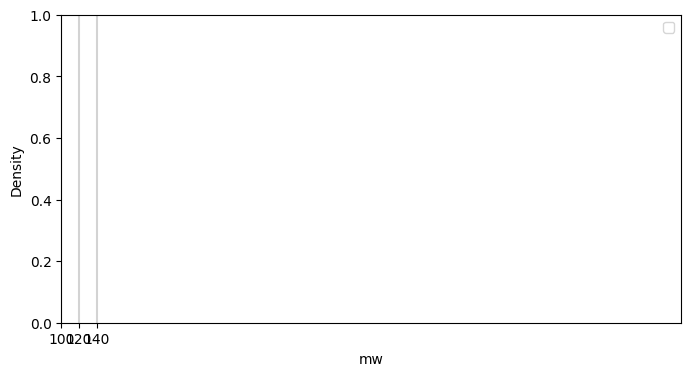

In [ ]:
target_logp_list = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
target_tpsa_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180]
target_mw_list = [100, 120, 140]
target_QED_list = [0.2, 0.4, 0.6, 0.8, 1.0]

# Generation Setting (MW)
property_name = 'mw'
property_fn = Chem.Descriptors.ExactMolWt

# Graph Setup
property_xlim = [250, 800]

# Generation
# generation_dict: {target_condition: generated_mol_list}
generation_dict = run_generation(scaffold_smiles, property_name, target_mw_list, num_samples)

# Plot Distribution
show_property_distribution(generation_dict, property_name, target_mw_list, property_xlim)


with open("file_MolWT_BBAR.txt", 'w') as f:
    for s in generation_dict:
        f.write(str(s) + '\n')

#save
#import pandas as pd
#file_new_pred = pd.DataFrame(generation_dict)
#print(file_new_pred)
#file_new_pred.to_csv('BBAR_new_mw.csv')

In [ ]:
for i in generation_dict:
  print(i)

100
120
140


In [ ]:
with open("file_MolWT_BBAR.txt", 'w') as f:
    for s in generation_dict:
        f.write(str(s) + '\n')

#save
#import pandas as pd
#file_new_pred = pd.DataFrame(generation_dict)
#print(file_new_pred)
#file_new_pred.to_csv('BBAR_new_mw.csv')

In [ ]:
print(Chem.MolToSmiles(generation_dict))

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(dict)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)

TypeError: ignored

In [ ]:
print(generation_dict)

{100: [<rdkit.Chem.rdchem.Mol object at 0x7894f2caff40>, <rdkit.Chem.rdchem.Mol object at 0x7894f2cafe60>, <rdkit.Chem.rdchem.Mol object at 0x7894f2cafd80>, <rdkit.Chem.rdchem.Mol object at 0x7894f2cafca0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2cafbc0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2cafae0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2cafa00>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf920>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf8b0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf840>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf7d0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf760>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf6f0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf680>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf610>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf5a0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf530>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf4c0>, <rdkit.Chem.rdchem.Mol object at 0x7894f2caf450>, <rdkit.Chem.rdchem.Mol object at 0x7894f2ca

**TPSA**

Target Condition List

>  40, 60, 80, 100, 120, 140, 160, 180




In [ ]:
target_logp_list = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
target_tpsa_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180]
target_mw_list = [250, 300, 350, 400, 425, 450, 475, 500, 550, 600, 650, 700, 750]
target_QED_list = [0.2, 0.4, 0.6, 0.8, 1.0]

# Generation Setting (TPSA)
scaffold_smiles = 'c1ccccc1'
property_name = 'tpsa'
property_fn = Chem.Descriptors.TPSA
num_samples = 1
target_condition_list = [40]

# Graph Setup
property_xlim = [0, 240]

# Generation
# generation_dict: {target_condition: generated_mol_list}
generation_dict = run_generation(scaffold_smiles, property_name, target_condition_list, num_samples)

# Plot Distribution
show_property_distribution(generation_dict, property_name, target_condition_list, property_xlim)

NameError: ignored

In [ ]:
print(generation_dict)

**logP**

Target Condition List

>  -4.0, -2.0, -0.0, 2.0, 4.0, 6.0, 8.0

Generation Setup... Finish!
Generation Start!
Core Molecule: c1ccccc1
logp: -4.0	Success: 100/100	0.103 sec/mol
logp: -2.0	Success: 100/100	0.087 sec/mol
logp: 0.0	Success: 100/100	0.074 sec/mol
logp: 2.0	Success: 100/100	0.071 sec/mol
logp: 4.0	Success: 100/100	0.068 sec/mol
logp: 6.0	Success: 100/100	0.077 sec/mol
logp: 8.0	Success: 100/100	0.094 sec/mol


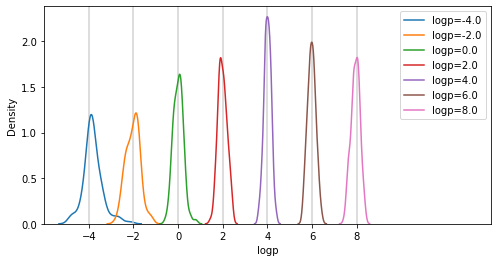

In [ ]:
target_logp_list = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
target_tpsa_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180]
target_mw_list = [250, 300, 350, 400, 425, 450, 475, 500, 550, 600, 650, 700, 750]
target_QED_list = [0.2, 0.4, 0.6, 0.8, 1.0]

# Generation Setting (LogP)
scaffold_smiles = 'c1ccccc1'
property_name = 'logp'
property_fn = Chem.Descriptors.MolLogP
num_samples = 100
target_condition_list = [-4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0]

# Graph Setup
property_xlim = [-6, 14]

# Generation
# generation_dict: {target_condition: generated_mol_list}
generation_dict = run_generation(scaffold_smiles, property_name, target_condition_list, num_samples)

# Plot Distribution
show_property_distribution(generation_dict, property_name, target_condition_list, property_xlim)

**QED**
Target Condition List

>  0.2, 0.4, 0.6, 0.8, 1.0

In [ ]:
target_logp_list = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
target_tpsa_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180]
target_mw_list = [250, 300, 350, 400, 425, 450, 475, 500, 550, 600, 650, 700, 750]
target_QED_list = [0.2, 0.4, 0.6, 0.8, 1.0]

# Generation Setting (QED)
scaffold_smiles = 'c1ccccc1'
property_name = 'qed'
property_fn = Chem.Descriptors.qed
num_samples = 100
target_condition_list = [0.2, 0.4, 0.6, 0.8, 1.0]

# Graph Setup
property_xlim = [0, 1.3]

# Generation
# generation_dict: {target_condition: generated_mol_list}
generation_dict = run_generation(scaffold_smiles, property_name, target_condition_list, num_samples)

# Plot Distribution
show_property_distribution(generation_dict, property_name, target_condition_list, property_xlim)

NameError: name 'run_generation' is not defined

**Step 3. Multi-Conditional Generation**

Target Condition List

LogP:

2.0, 4.0, 6.0

TPSA:

40, 100, 160

In [ ]:
target_logp_list = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
target_tpsa_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180]
target_mw_list = [250, 300, 350, 400, 425, 450, 475, 500, 550, 600, 650, 700, 750]
target_QED_list = [0.2, 0.4, 0.6, 0.8, 1.0]
file=[]

# Setup Generator
generator_config_path = f'./test/generation_config/logp_tpsa.yaml'
generator_config = OmegaConf.load(generator_config_path)
generator = MoleculeBuilder(generator_config)

# Run Generator
print('Generation Start!')
print(f'Core Molecule: {scaffold_smiles}')
generation_dict = {}
for target_logp in target_logp_list :
    for target_tpsa in target_tpsa_list :
        generated_mol_list = []
        condition = {'logp': target_logp, 'tpsa': target_tpsa}
        print(f'logp: {target_logp} tpsa: {target_tpsa}', end='\t')
        st = time.time()
        for _ in range(num_samples) :
            mol = generator.generate(scaffold_smiles, condition)
            if mol is not None :
                generated_mol_list.append(mol)
                file.append(Chem.MolToSmiles(mol))
        end = time.time()
        time_cost = end - st
        generation_dict[(target_logp, target_tpsa)] = generated_mol_list
        print(f'Success: {len(generated_mol_list)}/{num_samples}\t{time_cost/num_samples:.3f} sec/mol')
with open("file_logp_tpsa_BBAR.txt", 'w') as f:
    for s in file:
        f.write(str(s) + '\n')

FileNotFoundError: ignored

In [ ]:
fig = plt.figure(figsize=(6,6))
t = 0
for target_logp in target_logp_list :
    for target_tpsa in target_tpsa_list :
        generated_mol_list = generation_dict[(target_logp, target_tpsa)]
        xs = [Chem.Descriptors.MolLogP(mol) for mol in generated_mol_list]
        ys = [Chem.Descriptors.TPSA(mol) for mol in generated_mol_list]
        plt.scatter(xs, ys, s=2)
        t+=1

for target_logp in target_logp_list :
    for target_tpsa in target_tpsa_list :
        plt.scatter(target_logp, target_tpsa, marker='o', facecolor = 'none', edgecolors='k', linewidths=2, s=100)

plt.xlim(0, 8)
plt.xticks([3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
plt.ylim(20, 180)
plt.yticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180])
plt.xlabel('logp')
plt.ylabel('tpsa')
plt.show()

KeyError: (3.0, 1)

<Figure size 600x600 with 0 Axes>

In [ ]:
import numpy
f = open('/content/bbar/file_logp_tpsa_BBAR.txt')
numpy.savetxt("desc_scaf_prob_mw.txt", f)

ValueError: ignored

***Мой код***

In [ ]:
#target_logp_list = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
target_logp_list = [3]
target_tpsa_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 180]
#target_mw_list = [450, 475, 500, 550, 600, 650, 700, 750]
target_mw_list = [700, 750]
target_QED_list = [0.2, 0.4, 0.6, 0.8, 1.0]
file=[]

# Setup Generator
generator_config_path = f'./test/generation_config/mw.yaml'
generator_config = OmegaConf.load(generator_config_path)
generator = MoleculeBuilder(generator_config)

# Run Generator
print('Generation Start!')
print(f'Core Molecule: {scaffold_smiles}')
generation_dict = {}
for target_mw in target_mw_list :
    for target_logp in target_logp_list :
        generated_mol_list = []
        condition = {'mw': target_mw}
        print(f'mw: {target_mw}', end='\t')
        st = time.time()
        for _ in range(num_samples) :
            mol = generator.generate(scaffold_smiles, condition)
            if mol is not None :
                generated_mol_list.append(mol)
                file.append(Chem.MolToSmiles(mol))
        end = time.time()
        time_cost = end - st
        generation_dict[(target_mw)] = generated_mol_list
        print(f'Success: {len(generated_mol_list)}/{num_samples}\t{time_cost/num_samples:.3f} sec/mol')
with open("/content/file_mw_logp_BBAR.txt", 'w') as f:
    for s in file:
        f.write(str(s) + '\n')

Generation Start!
Core Molecule: CC(=C)C1CCC2(C1C3CCC4C5(CCC(C(C5CCC4(C3(CC2)C)C)(C)C)O)C)CO
mw: 700	

AtomValenceException: ignored

In [ ]:
with open("/content/file_mw_logp_BBAR.txt", 'w') as f:
    for s in file:
        f.write(str(s) + '\n')

**Step 4. Design inhibitors against 3CL Protease of SARS-Cov-2**

In [ ]:
# Generation Setting (3CL)
scaffold_smiles = 'c1ccccc1'
property_name = 'affinity'
target_condition = -10

# Setup Generator
generator_config_path = f'./test/generation_config/3cl_affinity.yaml'
generator_config = OmegaConf.load(generator_config_path)
generator = MoleculeBuilder(generator_config)

# Run Generator
print('Generation Start!')
print(f'Core Molecule: {scaffold_smiles}')
print()

for _ in range(5) :
    mol = generator.generate(scaffold_smiles, {'affinity': target_condition})
    if mol is not None :
        print(Chem.MolToSmiles(mol))
        display_molecule(mol, size=(200, 200))
        print()



### 6.3 Дизайн лиганда под белок

DiffSBDD: Structure-based Drug Design with Equivariant Diffusion Models

https://github.com/arneschneuing/DiffSBDD

### 6.4 molecule_generator (по скаффолду)


https://github.com/kevinid/molecule_generator/blob/master/examples.ipynb

### 6.5 iPPIGAN_generate

https://github.com/AspirinCode/iPPIGAN/blob/main/iPPIGAN_generate.ipynb

In [ ]:
!git clone https://github.com/AspirinCode/iPPIGAN

In [ ]:
from iPPIGAN_lstm import CompoundGenerator
import os
import torch

%matplotlib inline
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
print(torch.__version__)

In [ ]:
torch.backends.cudnn.enabled = False
my_gen = CompoundGenerator(use_cuda=True)  # set use_cuda=False if you do not have a GPU.

In [ ]:
# Load the weights of the models
D_weights =  os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/D-120000.pkl")
G_weights =  os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/G-120000.pkl")
encoder_weights =  os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/encoder-120000.pkl")
decoder_weights =os.path.join("/home/jupyterroot/iPPIGAN_lstm/models/decoder-120000.pkl")
my_gen.load_weight(D_weights, G_weights, encoder_weights, decoder_weights)

In [ ]:
seed_mol = "CC1(C)CCC(CN2CCN(CC2)C2=CC=C(C(=O)NS(=O)(=O)C3=CC=C(NCC4CCOCC4)C(=C3)[N+]([O-])=O)C(OC3=CN=C4NC=CC4=C3)=C2)=C(C1)C1=CC=C(Cl)C=C1"
#mol = AllChem.MolFromPDBFile('./iPPIGAN_lstm/p53pep.pdb')
#seed_mol = Chem.MolToSmiles(mol)
#print(seed_mol)
len(seed_mol)

In [ ]:
gen_mols = my_gen.generate_molecules(seed_mol,
                                     n_attemps=500, # [1, 10000]How many attemps of generations will be carried out
                                     lam_fact=1.,  # [1, 5]Variability factor
                                     probab=True,  # Probabilistic RNN decoding
                                     filter_unique_valid=True)  # Filter out invalids and replicates

In [ ]:
# Seed molecule
Chem.MolFromSmiles(seed_mol)

In [ ]:
# Generated Molecules
Chem.Draw.MolsToGridImage(gen_mols, molsPerRow=4, subImgSize=(300, 300), maxMols=200)

In [ ]:
for i in range(len(gen_mols)):
    smi = Chem.MolToSmiles(gen_mols[i])
    print(smi)

In [ ]:
with open('./iPPIGAN_lstm/gen_smiles/gen_Bcl2_smiles.csv', 'w') as f:
    for i in range(len(gen_mols)):
        smi = Chem.MolToSmiles(gen_mols[i])
        f.write(smi+"\n")

### 6.6 seq2seq-fingerprint


https://github.com/XericZephyr/seq2seq-fingerprint/blob/master/README.md

### 6.7 Generative molecular design in low data regimes

https://github.com/ETHmodlab/virtual_libraries/blob/master/README.md

### 6.8 Скучный перебор возможных вариаций объединения набора скаффолдов между собой


https://github.com/XuhanLiu/DrugEx

### 6.9 GuacaMol - A package for benchmarking of models for de novo molecular design.

https://github.com/BenevolentAI/guacamol_baselines

### 6.10 DeepDrugCoder (DDC): Heteroencoder for molecular encoding and de novo generation

https://github.getafreenode.com/pcko1/Deep-Drug-Coder/blob/master/README.md

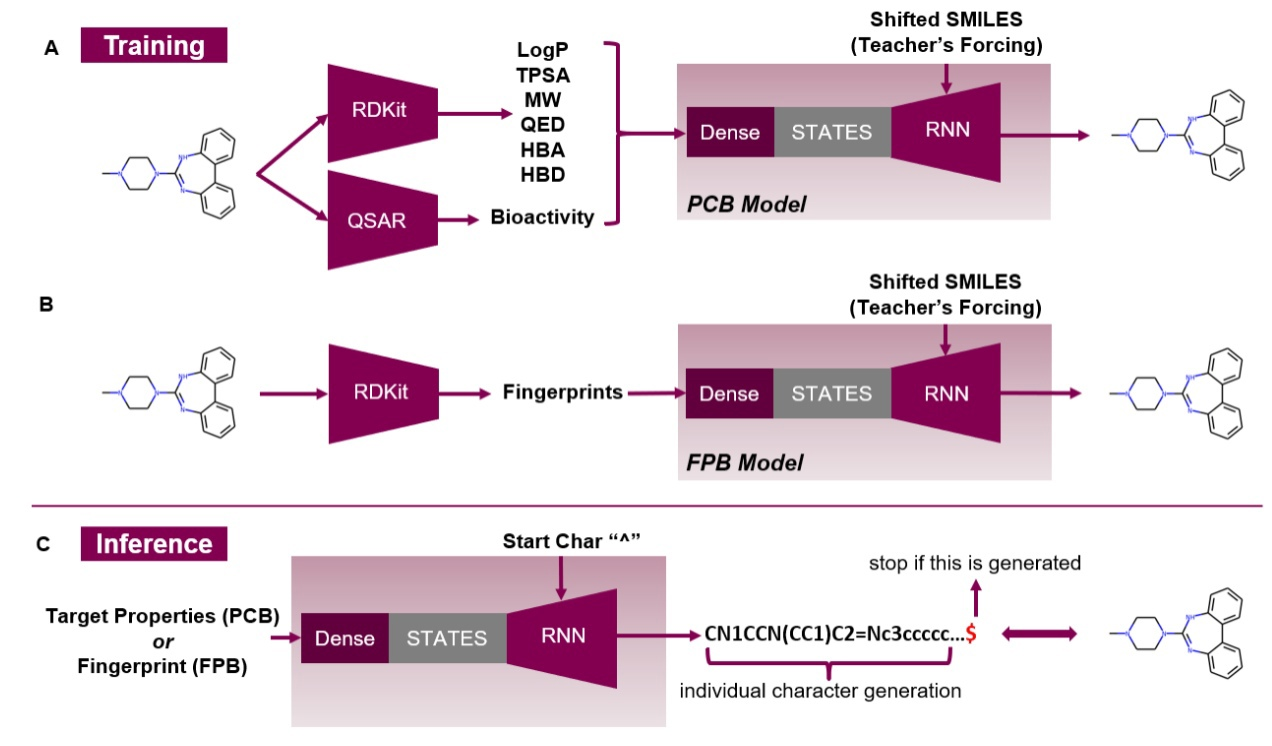

#7.Molecular filtering: ADME and lead-likeness criteria

https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb

In [ ]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [ ]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"


read smi from csv new_compound


In [ ]:
import pandas as pd

In [ ]:
molecules = pd.read_csv("/content/Mols_new_MAO_pred.csv")

In [ ]:
molecules

,name,smiles
0,2,C=CC(C)(O)CC12CCC3C(C)(CCC4(CO)CCC(C(=C)C)C34C...
1,3,C=C(C)C(O)C12C(C(=C)C)CCC1(CO)CCC1(C)C2CCC2C3(...
2,4,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...
3,5,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5C(C)(C)C(O)CCC...
4,6,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...
...,...,...
6490,6492,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5(C(O)(CC)C(F)(...
6491,6493,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C3(C)CCC3(C(=O)C)...
6492,6494,C=C(C)C1(C[N+])CCC2(CO)CCC3(C)C(CCC4C5(C)C(O)C...
6493,6495,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)(C(=C(...


,name,smiles,ROMol
0,2,C=CC(C)(O)CC12CCC3C(C)(CCC4(CO)CCC(C(=C)C)C34C...,
1,3,C=C(C)C(O)C12C(C(=C)C)CCC1(CO)CCC1(C)C2CCC2C3(...,
2,4,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,
3,5,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5C(C)(C)C(O)CCC...,
4,6,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,
...,...,...,...
6490,6492,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5(C(O)(CC)C(F)(...,
6491,6493,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C3(C)CCC3(C(=O)C)...,
6492,6494,C=C(C)C1(C[N+])CCC2(CO)CCC3(C)C(CCC4C5(C)C(O)C...,
6493,6495,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)(C(=C(...,

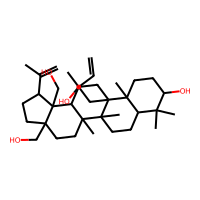
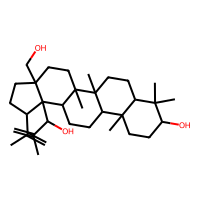
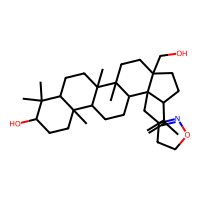
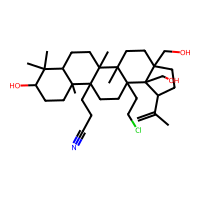
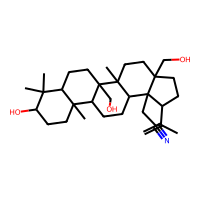
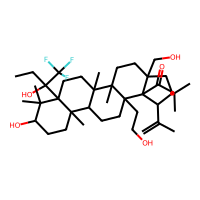
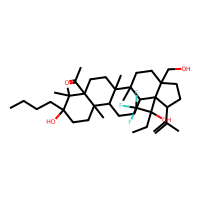
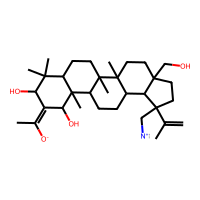
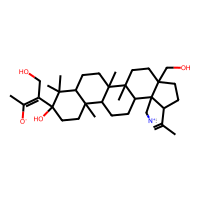
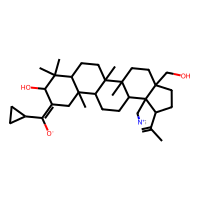

In [ ]:
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")
molecules

##7.1Calculate and plot molecular properties for Ro5


In [ ]:
molecules["molecular_weight"] = molecules["ROMol"].apply(Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(Descriptors.MolLogP)
# NBVAL_CHECK_OUTPUT
molecules[["molecular_weight", "n_hba", "n_hbd", "logp"]]


,molecular_weight,n_hba,n_hbd,logp
0,556.449160,4,4,7.05700
1,512.422946,3,3,7.30440
2,525.418195,4,2,7.53380
3,587.410522,4,3,8.03278
4,497.386894,4,3,6.25348
...,...,...,...,...
6490,682.478410,5,4,8.41870
6491,666.483495,4,3,9.59040
6492,526.389634,4,3,4.65110
6493,554.420934,4,3,5.43290


,name,smiles,ROMol,molecular_weight,n_hba,n_hbd,logp
0,2,C=CC(C)(O)CC12CCC3C(C)(CCC4(CO)CCC(C(=C)C)C34C...,,556.449160,4,4,7.05700
1,3,C=C(C)C(O)C12C(C(=C)C)CCC1(CO)CCC1(C)C2CCC2C3(...,,512.422946,3,3,7.30440
2,4,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,,525.418195,4,2,7.53380
3,5,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5C(C)(C)C(O)CCC...,,587.410522,4,3,8.03278
4,6,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,,497.386894,4,3,6.25348
...,...,...,...,...,...,...,...
6490,6492,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5(C(O)(CC)C(F)(...,,682.478410,5,4,8.41870
6491,6493,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C3(C)CCC3(C(=O)C)...,,666.483495,4,3,9.59040
6492,6494,C=C(C)C1(C[N+])CCC2(CO)CCC3(C)C(CCC4C5(C)C(O)C...,,526.389634,4,3,4.65110
6493,6495,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)(C(=C(...,,554.420934,4,3,5.43290

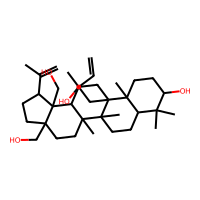
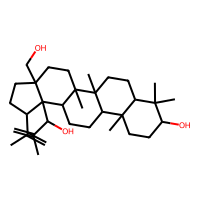
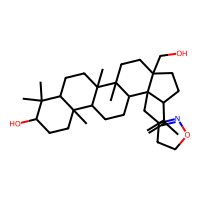
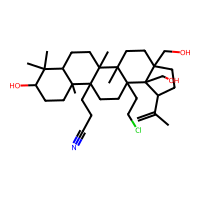
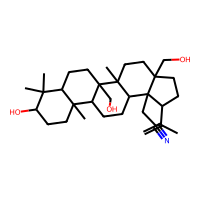
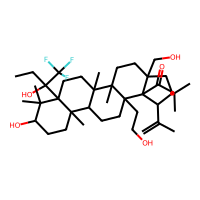
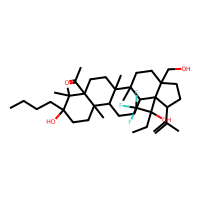
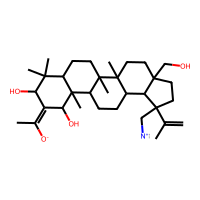
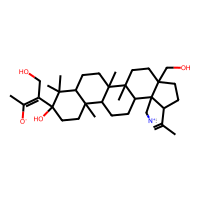
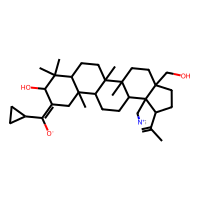

In [ ]:
# Full preview
molecules

In [ ]:
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

ValueError: ignored

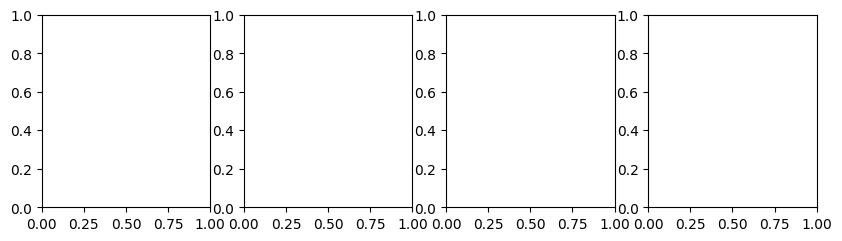

In [ ]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(molecules) + 1)
colors = ["red", "green", "blue", "cyan"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([1, 2, 3, 4], molecules[key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend
legend_elements = [
    mpatches.Patch(color=row["color"], label=row["name"]) for index, row in molecules.iterrows()
]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

##7.2 Investigate compliance with Ro5


In [ ]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [ ]:
# NBVAL_CHECK_OUTPUT
for name, smiles in zip(molecules["name"], molecules["smiles"]):
    print(f"Ro5 fulfilled for {name}: {calculate_ro5_properties(smiles)['ro5_fulfilled']}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Ro5 fulfilled for 1497: False
Ro5 fulfilled for 1498: False
Ro5 fulfilled for 1499: False
Ro5 fulfilled for 1500: False
Ro5 fulfilled for 1501: False
Ro5 fulfilled for 1502: False
Ro5 fulfilled for 1503: False
Ro5 fulfilled for 1504: False
Ro5 fulfilled for 1505: False
Ro5 fulfilled for 1506: False
Ro5 fulfilled for 1507: False
Ro5 fulfilled for 1508: False
Ro5 fulfilled for 1509: True
Ro5 fulfilled for 1510: False
Ro5 fulfilled for 1511: True
Ro5 fulfilled for 1512: False
Ro5 fulfilled for 1513: True
Ro5 fulfilled for 1514: True
Ro5 fulfilled for 1515: True
Ro5 fulfilled for 1516: True
Ro5 fulfilled for 1517: True
Ro5 fulfilled for 1518: False
Ro5 fulfilled for 1519: False
Ro5 fulfilled for 1520: False
Ro5 fulfilled for 1521: False
Ro5 fulfilled for 1522: False
Ro5 fulfilled for 1523: True
Ro5 fulfilled for 1524: True
Ro5 fulfilled for 1525: True
Ro5 fulfilled for 1526: True
Ro5 fulfilled for 1527: True
Ro5 fulfilled 

##7.3 Apply Ro5 to the EGFR dataset

In [ ]:
molecules = pd.read_csv("/content/Mols_new_MAO_pred.csv", index_col=0)
print(molecules.shape)
molecules.head()

(6495, 1)


,smiles
name,
2,C=CC(C)(O)CC12CCC3C(C)(CCC4(CO)CCC(C(=C)C)C34C...
3,C=C(C)C(O)C12C(C(=C)C)CCC1(CO)CCC1(C)C2CCC2C3(...
4,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...
5,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5C(C)(C)C(O)CCC...
6,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...


In [ ]:
# This takes a couple of seconds
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
name,,,,,
2,556.449160,4,4,7.05700,False
3,512.422946,3,3,7.30440,False
4,525.418195,4,2,7.53380,False
5,587.410522,4,3,8.03278,False
6,497.386894,4,3,6.25348,True


In [ ]:
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules.head()

,smiles,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
name,,,,,,
2,C=CC(C)(O)CC12CCC3C(C)(CCC4(CO)CCC(C(=C)C)C34C...,556.449160,4,4,7.05700,False
3,C=C(C)C(O)C12C(C(=C)C)CCC1(CO)CCC1(C)C2CCC2C3(...,512.422946,3,3,7.30440,False
4,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,525.418195,4,2,7.53380,False
5,C=C(C)C1CCC2(CO)CCC3(C)C4(C)CCC5C(C)(C)C(O)CCC...,587.410522,4,3,8.03278,False
6,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,497.386894,4,3,6.25348,True


In [ ]:
# Note that the column "ro5_fulfilled" contains boolean values.
# Thus, we can use the column values directly to subset data.
# Note that ~ negates boolean values.
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]
molecules_ro5_violated = molecules[~molecules["ro5_fulfilled"]]

print(f"# compounds in unfiltered data set: {molecules.shape[0]}")
print(f"# compounds in filtered data set: {molecules_ro5_fulfilled.shape[0]}")
print(f"# compounds not compliant with the Ro5: {molecules_ro5_violated.shape[0]}")
# NBVAL_CHECK_OUTPUT

# compounds in unfiltered data set: 6495
# compounds in filtered data set: 389
# compounds not compliant with the Ro5: 6106


In [ ]:
# Save filtered data
molecules_ro5_fulfilled.to_csv("/content/Mols_new_MAO_pred_lipinski.csv")
molecules_ro5_fulfilled.head()

,smiles,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
name,,,,,,
6,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,497.386894,4,3,6.25348,True
13,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C5(C)CCC(O)C(C)(C...,481.391980,3,2,7.28108,True
14,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4(CCC#N)C5(C)CCC(O...,495.407630,3,2,7.67118,True
15,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4(CC#N)C5(C)CCC(O)...,481.391980,3,2,7.28108,True
18,C=C(C)C1CCC2(CO)CCC3(C)C(CCC4C3(C)CCC3(CC#N)C(...,481.391980,3,2,7.28108,True


##7.4 Visualize Ro5 properties (radar plot)
###Calculate statistics on Ro5 properties

In [ ]:
def calculate_mean_std(dataframe):
    """
    Calculate the mean and standard deviation of a dataset.

    Parameters
    ----------
    dataframe : pd.DataFrame
        Properties (columns) for a set of items (rows).

    Returns
    -------
    pd.DataFrame
        Mean and standard deviation (columns) for different properties (rows).
    """
    # Generate descriptive statistics for property columns
    stats = dataframe.describe()
    # Transpose DataFrame (statistical measures = columns)
    stats = stats.T
    # Select mean and standard deviation
    stats = stats[["mean", "std"]]
    return stats

In [ ]:
molecules_ro5_fulfilled_stats = calculate_mean_std(
    molecules_ro5_fulfilled[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_fulfilled_stats
# NBVAL_CHECK_OUTPUT

,mean,std
molecular_weight,497.867015,34.029738
n_hba,2.940874,1.114155
n_hbd,2.467866,0.708651
logp,6.816366,1.099374


In [ ]:
molecules_ro5_violated_stats = calculate_mean_std(
    molecules_ro5_violated[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_violated_stats

,mean,std
molecular_weight,606.609192,70.557170
n_hba,3.487062,1.331621
n_hbd,2.501965,0.733707
logp,8.638121,1.701439


In [ ]:
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    """
    Scale values for different properties that have each an individually defined threshold.

    Parameters
    ----------
    stats : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.

    Returns
    -------
    pd.DataFrame
        DataFrame with scaled means and standard deviations for each physiochemical property.
    """
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

In [ ]:
def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

In [ ]:
def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):
    """
    Plot a radar chart based on the mean and standard deviation of a data set's properties.

    Parameters
    ----------
    y : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.
    properties_labels : list of str
        List of property names to be used as labels in the plot.
    y_max : None or int or float
        Set maximum y value. If None, let matplotlib decide.
    output_path : None or pathlib.Path
        If not None, save plot to file.
    """

    # Define radial x-axes angles -- uses our helper function!
    x = _define_radial_axes_angles(len(y))
    # Scale y-axis values with respect to a defined threshold -- uses our helper function!
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = pd.concat([y, y.head(1)])

    # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.fill(x, [scaled_threshold] * len(x), "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # From here on, we only do plot cosmetics
    # Set 0° to 12 o'clock
    ax.set_theta_offset(math.pi / 2)
    # Set clockwise rotation
    ax.set_theta_direction(-1)

    # Set y-labels next to 180° radius axis
    ax.set_rlabel_position(180)
    # Set number of radial axes' ticks and remove labels
    plt.xticks(x, [])
    # Get maximal y-ticks value
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # Set axes limits
    plt.ylim(0, y_max)
    # Set number and labels of y axis ticks
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    # Draw ytick labels to make sure they fit properly
    # Note that we use [:1] to exclude the last element which equals the first element (not needed here)
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    # Add legend relative to top-left plot
    labels = ("mean", "mean + std", "mean - std", "rule of five area")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    # Save plot - use bbox_inches to include text boxes
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

In [ ]:
thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "# HBA / 2",
    "# HBD",
    "LogP",
]
y_max = 8

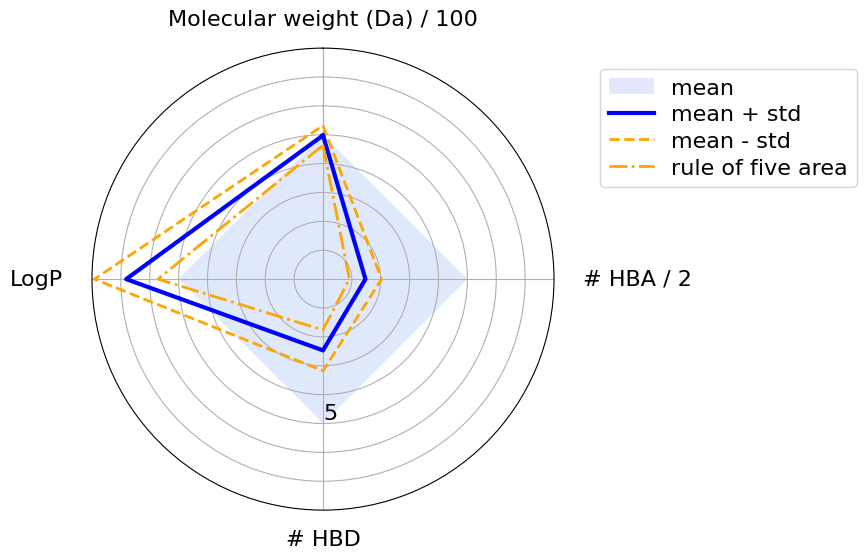

In [ ]:
plot_radar(
    molecules_ro5_fulfilled_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)

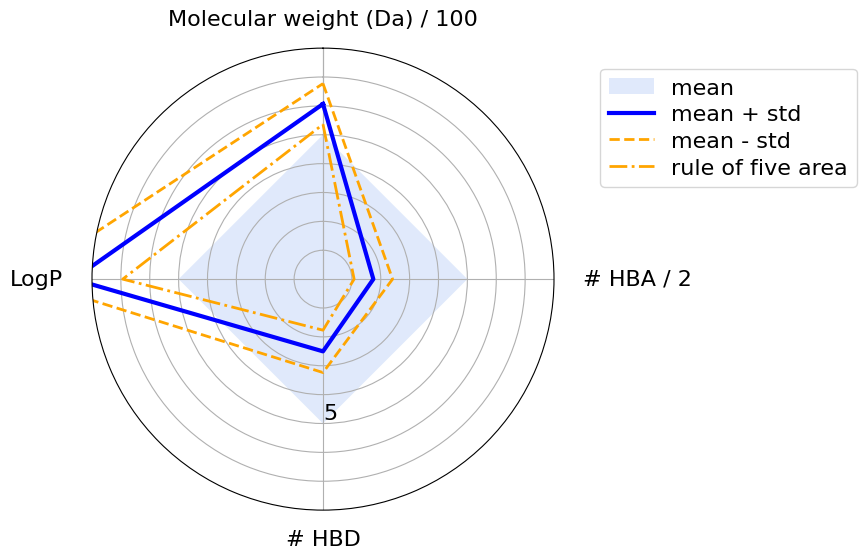

In [ ]:
plot_radar(
    molecules_ro5_violated_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)